In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# N = Number of Input Neurons
N = np.array([])
N_w1 = np.array([])
N_w2 = np.array([])
N_std_dev_w1 = np.array([])
N_std_dev_w2 = np.array([])

In [56]:
data0 = np.load("25_input_neurons_w1_w2.npz")
N = np.append(N, data0['N'])
N_w1 = np.append(N_w1, data0['w1'])
N_w2 = np.append(N_w2, data0['w2'])
N_std_dev_w1 = np.append(N_std_dev_w1, data0['std_dev_w1_10_samples'])
N_std_dev_w2 = np.append(N_std_dev_w2, data0['std_dev_w2_10_samples'])

In [57]:
name_str='{}_input_neurons_w1_w2.npz'
sample_list = np.arange(50,500,50)

for sample in sample_list:
    data = np.load(name_str.format(sample))
    N = np.append(N, data['N'])
    N_w1 = np.append(N_w1, data['w1'])
    N_w2 = np.append(N_w2, data['w2'])
    N_std_dev_w1 = np.append(N_std_dev_w1, data['std_dev_w1_10_samples'])
    N_std_dev_w2 = np.append(N_std_dev_w2, data['std_dev_w2_10_samples'])

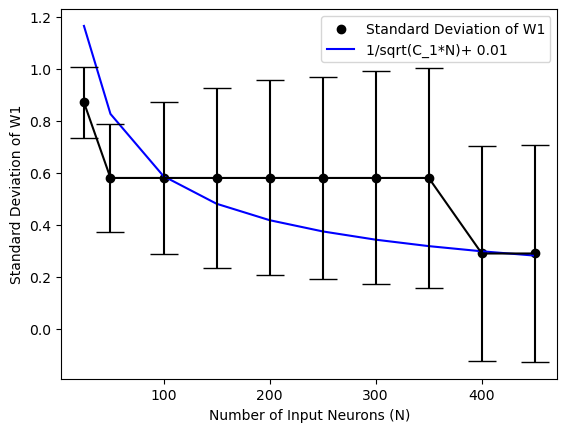

In [58]:
fig, ax = plt.subplots()
ax.scatter(N, N_w1, color="k")
ax.plot(N, (1/np.sqrt(0.03*N))+0.01, color="b")
ax.errorbar(N, N_w1, N_std_dev_w1, capsize = 10.0, color= "k")
ax.set_xlabel("Number of Input Neurons (N)")
ax.set_ylabel("Standard Deviation of W1")
ax.legend(('Standard Deviation of W1','1/sqrt(C_1*N)+ 0.01'))
fig.savefig("W1_vs_N.png")

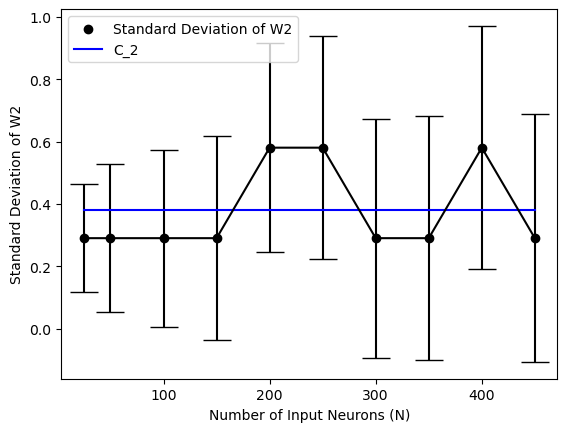

In [59]:
fig2, ax2 = plt.subplots()
ax2.scatter(N, N_w2, color="k")
ax2.errorbar(N, N_w2, N_std_dev_w2, capsize = 10.0, color= "k")
ax2.plot(N,0.38*np.ones(len(N)), color="b")
ax2.set_xlabel("Number of Input Neurons (N)")
ax2.set_ylabel("Standard Deviation of W2")
ax2.legend(('Standard Deviation of W2','C_2'))
fig2.savefig("W2_vs_N.png")

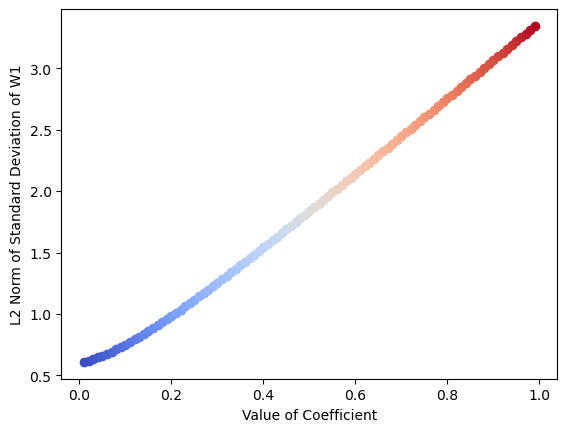

In [60]:
color = iter(plt.cm.coolwarm(np.linspace(0, 1, 99)))
fig3, ax3 = plt.subplots()
list =[]
for j in np.arange(0.01, 1, 0.01):
      c = next(color)
      ax3.scatter(j, np.linalg.norm(N_w1 - 1/np.sqrt(0.03*N)+j,2), color=c)
      list.append(np.linalg.norm(N_w1 - 1/np.sqrt(0.03*N)+j,2))
      ax3.set_xlabel("Value of Coefficient")
      ax3.set_ylabel("L2 Norm of Standard Deviation of W1")
      fig3.savefig("L2_Norm_Standard_Deviation_of_W1_1.png")


In [61]:
x = np.arange(0.01,1,0.01)
x[np.argmin(list)]

0.01

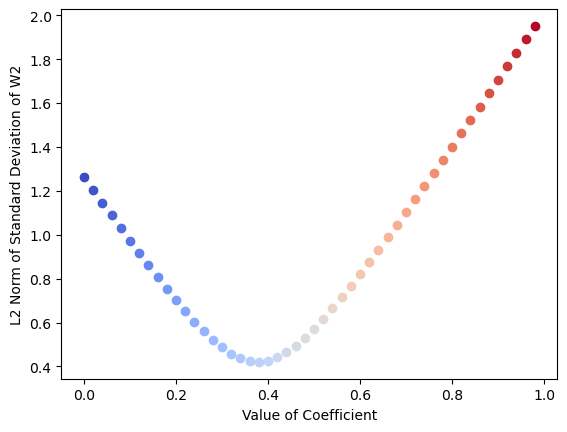

In [62]:
color = iter(plt.cm.coolwarm(np.linspace(0, 1, 50)))
fig4, ax4 = plt.subplots()
list2 = []
for i in np.arange(0,1,0.02):
    c = next(color)
    ax4.scatter(i,np.linalg.norm(N_w2 - i*np.ones(len(N)),2), color=c)
    list2.append(np.linalg.norm(N_w2 - i*np.ones(len(N)),2))
    ax4.set_xlabel("Value of Coefficient")
    ax4.set_ylabel("L2 Norm of Standard Deviation of W2")
    fig4.savefig("L2_Norm_Standard_Deviation_of_W2.png")

In [63]:
x = np.arange(0,1,0.02)
x[np.argmin(list2)]

0.38